In [1]:
import os
import glob
import re

import numpy as np
import matplotlib.pyplot as plt

import pywt
import wfdb

import confmain
from util_module import util_func

In [2]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, '../data/ludb')

hea_paths = sorted(glob.glob(os.path.join(data_dir, '*hea')), key=lambda x:float(re.findall("(\d+)",x)[0]))

In [3]:
hea_paths

['c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\1.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\2.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\3.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\4.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\5.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\6.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\7.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\8.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\9.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\10.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\11.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\12.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\13.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\14.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\15.hea',
 'c:\\dev\\ecg-delineation\\main-other\\../data/ludb\\16.hea',
 

In [4]:
all_signal = []

for path in hea_paths:
    record_path = os.path.splitext(path)[0]
    record = wfdb.rdrecord(record_path)
    for i in range(12):
        all_signal.append(record.p_signal[:, i]) # All lead

In [5]:
all_signal

[array([-0.07342657, -0.02855478,  0.01689977, ..., -0.04079254,
        -0.03671329, -0.04195804]),
 array([ 0.01907131,  0.0787728 ,  0.16003317, ..., -0.03648425,
        -0.00746269, -0.0199005 ]),
 array([0.12205045, 0.1179821 , 0.13425549, ..., 0.02196908, 0.04475183,
        0.03986981]),
 array([ 0.0380117 , -0.01608187, -0.08040936, ...,  0.04239766,
         0.02704678,  0.03581871]),
 array([-0.1001462 , -0.07017544, -0.04897661, ..., -0.03508772,
        -0.04312865, -0.04385965]),
 array([ 0.12320917,  0.17048711,  0.25644699, ..., -0.01289398,
         0.03151862,  0.01719198]),
 array([ 0.11005831,  0.13702624,  0.17346939, ..., -0.00291545,
        -0.00801749, -0.00947522]),
 array([ 0.03816794,  0.10368957,  0.20038168, ..., -0.09033079,
        -0.08524173, -0.03180662]),
 array([ 0.02744577,  0.09163347,  0.17662683, ..., -0.08986277,
        -0.1062417 , -0.05179283]),
 array([ 0.06085455,  0.13206733,  0.2149331 , ..., -0.07941303,
        -0.09020285, -0.04402244

In [6]:
len(all_signal[0])

5000

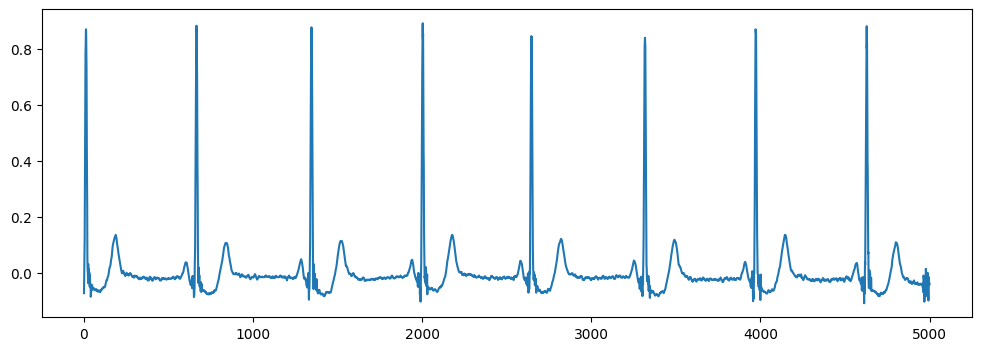

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(all_signal[0])

In [8]:
wavelets = ['db6', 'db7', 'db8', 'db9', 'sym4', 'sym5', 'sym6', 'sym7', 'haar', 'coif2', 'coif3', 'coif4', 'coif5', 'bior1.3', 'bior2.4', 'bior3.3', 'bior5.5', 'bior6.8']

In [9]:
average_snr = dict()
DECOMPOSE_LEVEL = 7

for wavelet in wavelets:
    all_snr = []
    for original_signal in all_signal:
        denoised_signal = util_func.denoise_dwt(original_signal, wavelet, DECOMPOSE_LEVEL)
        all_snr.append(np.nan_to_num(util_func.calculate_snr(original_signal, denoised_signal), nan=0))
    
    average_snr[wavelet] = np.mean(all_snr)

c:\dev\ecg-delineation\env\Lib\site-packages\pywt\_thresholding.py:23: RuntimeWarning: invalid value encountered in divide
  thresholded = (1 - value/magnitude)


In [10]:
average_snr

{'db6': 34.42337885670858,
 'db7': 34.39637707008837,
 'db8': 34.31619436848488,
 'db9': 34.34533920403397,
 'sym4': 34.269723279229474,
 'sym5': 34.50067953018252,
 'sym6': 34.486756137019604,
 'sym7': 34.65053191483842,
 'haar': 26.49508758946581,
 'coif2': 34.194188627434805,
 'coif3': 34.38428491391514,
 'coif4': 34.435363866589896,
 'coif5': 34.45529251344809,
 'bior1.3': 26.975445039318366,
 'bior2.4': 50.89298444458838,
 'bior3.3': 47.089090183022336,
 'bior5.5': 32.743777230878024,
 'bior6.8': 34.706538066353225}

In [11]:
dict(sorted(average_snr.items(), key=lambda item: item[1]))

{'haar': 26.49508758946581,
 'bior1.3': 26.975445039318366,
 'bior5.5': 32.743777230878024,
 'coif2': 34.194188627434805,
 'sym4': 34.269723279229474,
 'db8': 34.31619436848488,
 'db9': 34.34533920403397,
 'coif3': 34.38428491391514,
 'db7': 34.39637707008837,
 'db6': 34.42337885670858,
 'coif4': 34.435363866589896,
 'coif5': 34.45529251344809,
 'sym6': 34.486756137019604,
 'sym5': 34.50067953018252,
 'sym7': 34.65053191483842,
 'bior6.8': 34.706538066353225,
 'bior3.3': 47.089090183022336,
 'bior2.4': 50.89298444458838}